In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

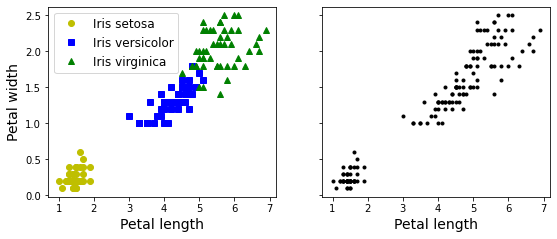

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [4]:
# Gaussian mixture to separate with petal length & width and sepal length & width
from sklearn.mixture import GaussianMixture

In [5]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [6]:
from scipy import stats
# map each cluster to a class
mapping = {}
for class_id in np.unique(y):
#     print(class_id)
    # status mode picks most common class for each cluster
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
# print(y_pred)

In [8]:
# X

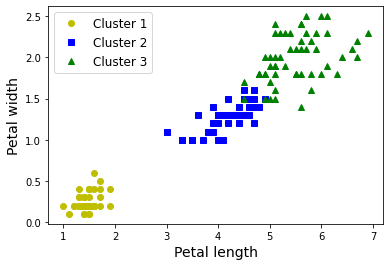

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


In [10]:

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [12]:


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

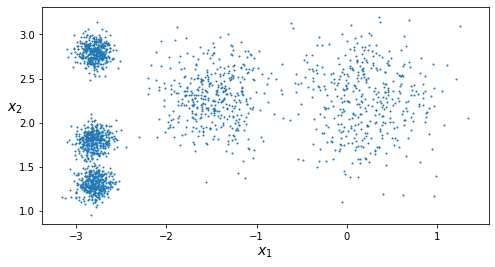

In [13]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [14]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([4, 2, 0, ..., 3, 0, 2])

In [16]:
y_pred is kmeans.labels_

True

In [17]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [18]:

X_new = np.array([[0, 2], [1, 2], [-1, 4], [-3, 5]])
kmeans.predict(X_new)

array([0, 0, 1, 3])

In [19]:
# soft clustering
# displays distance from centroids
kmeans.transform(X_new)

array([[0.32995317, 1.49439034, 2.81093633, 2.9042344 , 2.88633901],
       [0.83147037, 2.48330311, 3.80908853, 3.87561396, 3.86415653],
       [2.12234346, 1.77656881, 2.8440905 , 2.15942789, 3.24451805],
       [4.22236512, 3.11725939, 3.20482545, 2.21329963, 3.7045567 ]])

In [20]:
# if you know approx. centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
ikmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

# n_init = number of random initializations

In [21]:
y_predict = ikmeans.fit_predict(X)

In [22]:
kmeans.inertia_
# metric it uses for each instance is inertia

211.59853725816828

In [23]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

# mini batches. If does not fit in memory, can use memmap or partial_fit

MiniBatchKMeans(n_clusters=5)

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [25]:
# download the ladybug image
import os
import urllib.request


PROJECT_ROOT_DIR = os.path.dirname(os.path.abspath(os.curdir))
images_path = os.path.join(".", "images", "unsupervised_learning")
# print(images_path)
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1eb2ff42dc0>)

In [26]:
# clustering for image segmentation

from matplotlib.image import imread
image = imread(os.path.join(".", "images", "unsupervised_learning", "ladybug.png"))

In [27]:
image.shape

(533, 800, 3)

In [28]:
# reshape array to get list of RGB colors
X = image.reshape(-1, 3)
# cluster colors using K-Means
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [29]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=50).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

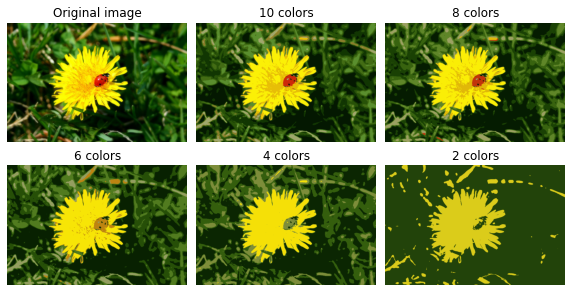

In [30]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

In [31]:
# Build Data with digits
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [33]:
# Test finding numbers using Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",max_iter=5000, random_state=50)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=50)

In [34]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [35]:
# K Means preprocess data into 50 clusters, then L Reg
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=50)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=50))])

In [36]:
pipeline.score(X_test, y_test)

0.9822222222222222

In [37]:
# GridSearchCV to find optimal clusters num

from sklearn.model_selection import GridSearchCV

# param_grid = dict(kmeans__n_clusters=range(2, 100))
param_grid = dict(kmeans__n_clusters=range(70, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ..............................kmeans__n_clusters=70; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.5s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=50))]),
             param_grid={'kmeans__n_clusters': range(70, 100)}, verbose=2)

In [38]:
grid_clf.best_params_

{'kmeans__n_clusters': 93}

In [39]:
grid_clf.score(X_test, y_test)

0.9822222222222222

In [40]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
print(param_grid)

{'kmeans__n_clusters': range(2, 100)}


In [41]:
# clustering for semi-supervised
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=50)

In [42]:
log_reg.score(X_test, y_test)

0.8466666666666667

In [53]:
# get 50 representative images for each cluster

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

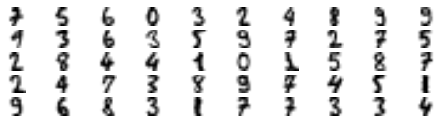

In [54]:

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [55]:
y_train[representative_digit_idx]

array([7, 5, 6, 0, 3, 2, 4, 8, 9, 9, 9, 3, 6, 3, 5, 9, 7, 2, 7, 5, 2, 8,
       4, 4, 1, 0, 1, 5, 8, 7, 2, 4, 7, 3, 8, 9, 7, 4, 5, 1, 9, 6, 8, 3,
       1, 7, 7, 3, 3, 4])

In [65]:
# manually label the representative image & train with the 50 images
y_representative_digits = np.array([
    7, 5, 6, 0, 3, 2, 4, 8, 9, 9, 
    9, 3, 6, 3, 5, 9, 7, 2, 7, 5, 
    2, 8, 4, 4, 1, 0, 1, 5, 8, 7, 
    2, 4, 7, 3, 8, 9, 7, 4, 5, 1, 
    9, 6, 8, 3, 1, 7, 7, 3, 3, 4])

In [67]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8911111111111111

In [ ]:
# propagate labels to all otherinstances (label propagation)
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
#     print(y_representative_digits[i])
#     print(y_train_propagated[kmeans.labels_==i])

In [68]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9111111111111111

In [69]:
# propagate labels to 20% of closest instances to centroids instead of all
# to minimize mislabelling
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
#     print(cluster_dist)
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
#     print(cutoff_distance)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)

In [70]:
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [71]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=50)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=50)

In [72]:
log_reg.score(X_test, y_test)

0.9

In [74]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9724137931034482

In [105]:
# dbscan
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [81]:
# dbscan.labels_

In [77]:
len(dbscan.core_sample_indices_)

800

In [80]:
# dbscan.core_sample_indices_

In [79]:
dbscan.components_

array([[ 0.04357316,  0.30095914],
       [ 0.666939  , -0.41071386],
       [ 1.97950551,  0.13930834],
       ...,
       [-0.92036708,  0.43082708],
       [ 0.10053281, -0.09384953],
       [ 0.21008051, -0.04853466]])

In [106]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [111]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

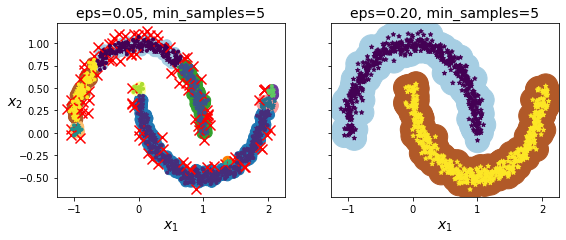

In [112]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

# increasing epsilon to 0.2 decreases from 7 clusters with a lot of anomalies 

In [89]:
dbscan = dbscan2

In [90]:
# dbscan does not have predict()
# instead, use different classification algorithms
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [91]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [92]:
knn.predict_proba(X_new)

array([[0.14, 0.86],
       [1.  , 0.  ],
       [0.24, 0.76],
       [1.  , 0.  ]])

In [93]:
# max distance before setting instances as anomalies 
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [129]:
# Gaussian Mixtures
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
# .r_ merges row
X = np.r_[X1, X2]
# print(X)
y = np.r_[y1, y2]

In [122]:
# uses EM (Expectation-Maximization) algorithm
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [118]:
gm.weights_

array([0.20961444, 0.39032584, 0.40005972])

In [119]:
gm.means_

array([[ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576],
       [-1.40764129,  1.42712848]])

In [126]:
gm.covariances_

array([[[ 0.68856426,  0.79633822],
        [ 0.79633822,  1.21252023]],

       [[ 1.14631283, -0.03285453],
        [-0.03285453,  0.95505142]],

       [[ 0.63477114,  0.72969538],
        [ 0.72969538,  1.16085164]]])

In [130]:
gm.converged_

True

In [131]:
gm.n_iter_

4

In [132]:
# predict for hard clustering
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [133]:
# predict_proba for soft clustering
gm.predict_proba(X)

array([[9.76903627e-01, 2.30956994e-02, 6.73632768e-07],
       [9.83009622e-01, 1.63176388e-02, 6.72738827e-04],
       [7.59268139e-05, 1.96800317e-06, 9.99922105e-01],
       ...,
       [4.38851876e-07, 9.99999561e-01, 2.09167854e-26],
       [5.40181989e-16, 1.00000000e+00, 1.41536116e-41],
       [2.38611270e-15, 1.00000000e+00, 7.72772760e-41]])

In [134]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.27041635, -0.01843962],
       [-1.19704637, -1.58108767],
       [ 3.90043115,  0.70198744],
       [ 4.14035638,  0.84309137],
       [-1.74134229,  0.69340538],
       [-2.88788331, -0.36907418]])

In [135]:
# probability density function 
# estimate density of model at any given location
gm.score_samples(X)

array([-2.60806011, -3.57076496, -3.3306168 , ..., -3.51374548,
       -4.39785401, -3.80701199])

In [146]:
resolution = 100
grid = np.arange(-10, 10, 1/resolution)
# print(len(grid))
# print(grid)
xx, yy = np.meshgrid(grid, grid)
print(len(xx), len(yy))
# print(xx)
# print(yy)
# print(len(xx.ravel()))
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

2000 2000


0.9999999999236656

In [149]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

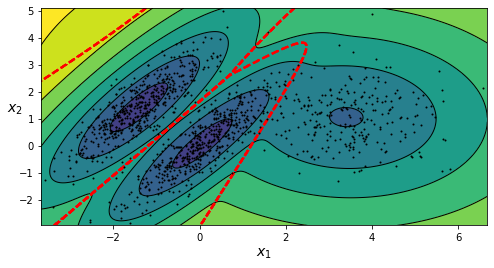

In [150]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

In [153]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_full.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=42)

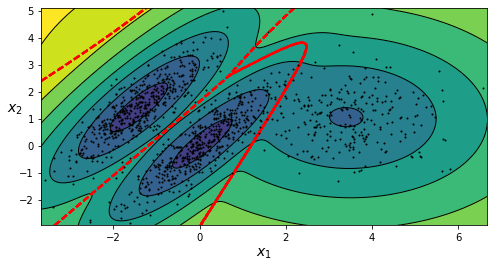

In [154]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm_full, X)

plt.show()

In [156]:
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_spherical.fit(X)

GaussianMixture(covariance_type='spherical', n_components=3, n_init=10,
                random_state=42)

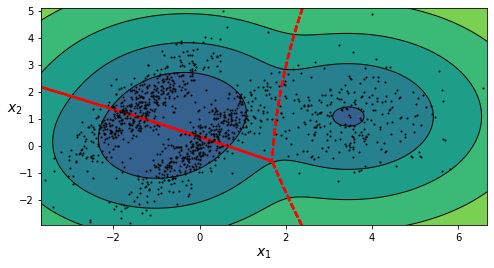

In [157]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm_spherical, X)

plt.show()

In [161]:
#anomaly detetction using Gaussian mixtures
# 4% threshold
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
print(density_threshold)
anomalies = X[densities < density_threshold]

-5.486559780693998


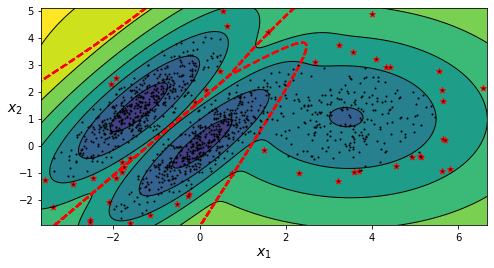

In [162]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()


In [163]:
gm.bic(X)

8189.718049665739

In [164]:
gm.aic(X)

8102.492769550701

In [165]:
# Use Bayesian Gaussian Mixture Model to find optimal num of clusters
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4, 0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])